In [1]:
import Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW

In [4]:
function af(p,l)
    n = length(p)
    for i=1:n
        if mod(i,l) == 0
            avg= 0
            for j= i-l+1:i
                avg = p[j] + avg
            end
            avg = avg*1/l
            p[i-l+1:i] = ones(l)*avg
        end
    end
    return p.*(p.>0)
end


#6,2 -- 4
#10,2, -- 5
#12, 2 --6


#6,3 -- 3,5
#9,3 --4,7
#12,3 - 5,9
#15,3 -- 6,11

#println(fft([1,1,1,4,4,4]))
#println(fft([1,1,1,4,4,4,5,5,5]))
#println(fft([1,1,1,4,4,4,5,5,5,7,7,7]))
#println(fft([1,1,1,4,4,4,5,5,5,7,7,7,8,8,8]))

#8,4 - 3,5,7
#12,4 - 4,7,10
#16,4 - 5,9,13
#16,4 - 6,11,15


print(fft([6,6,2,2]))

Complex{Float64}[16.0+0.0im, 4.0-4.0im, 0.0+0.0im, 4.0+4.0im]

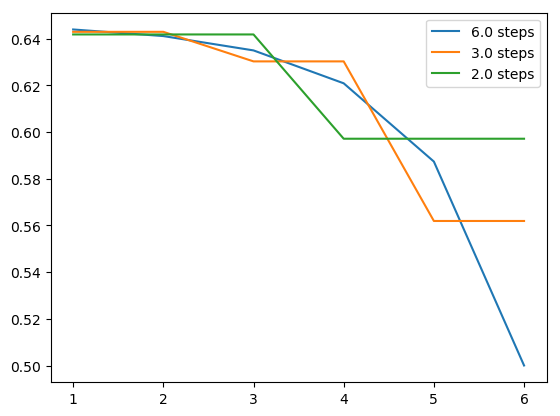

[0.64388, 0.641062, 0.63492, 0.620836, 0.587332, 0.500031][0.642874, 0.642874, 0.630218, 0.630218, 0.561895, 0.561895][0.641751, 0.641751, 0.641751, 0.597107, 0.597107, 0.597107]

In [9]:
function no_win(p,g)
    l = length(p)
    gs = reverse(g(p))
    result = ones(l)
    for i = 2:l
        for j=i:l
            result[i-1] = result[i-1]*gs[j]
        end
    end
    return reverse(result)
end

function create_obj(u,g)
    obj(p) = -1*u(p,g)
    return obj
end


function create_plot(n,l,u,g)
    p0 = .5*ones(n)
    for i=1:l
        if mod(n,i) == 0
            obj(p) = create_obj(u,g)(p)
            obj_avg(p) = obj(af(p,i))
            res = optimize(obj_avg,p0)
            ps = af( res.minimizer, i )
            print(ps)
            xs = collect( 1:length(ps) )
            plot(xs, ps, label="$(n/i) steps")
        end
    end
    legend()
    show()
    savefig("results2.png")
end

BETA = .7

f1(p) = clamp!(p,0, 1)
#f1(p) = clamp!(p.^2,0, 1)
#f1(p) = exp.( (-(p.-5).^2)./2 )/sqrt(2*pi)

u1(p,g) = p.*(ones(size(p)) - g(p)).*no_win(p,g)
u2(p,g) = sum((BETA*ones(length(p))).^collect(1:length(p)) .*u1(p,g))

create_plot(6,5,u2,f1)
